# **Задание**

**Классификация по тональности**

Необходимо классифицировать по тональности отзывы на банки с сайта banki.ru.

Данные содержат непосредственно тексты отзывов, некоторую дополнительную информацию, а также оценку по шкале от 1 до 5.

Тексты хранятся в json-ах в массиве responses.

Посмотрим на примере отзыва: возьмите для удобства ноутбук, размещенный в папке репозитория.

**Часть 1. Анализ текстов**

1. Посчитайте количество отзывов в разных городах и на разные банки

2. Постройте гистограмы длин слов в символах и в словах

3. Найдите 10 самых частых:
  *   слов
  *   слов без стоп-слов
  *   лемм
  *   существительных

4. Постройте кривые Ципфа и Хипса

5. Ответьте на следующие вопросы:

  *   какое слово встречается чаще, "сотрудник" или "клиент"?
  *   сколько раз встречается слова "мошенничество" и "доверие"?

6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру tf-idf для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1).

In [ ]:
import json
import bz2
from tqdm import tqdm

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

In [ ]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [02:26, 1375.13it/s]


In [ ]:
responses[:1]

[{'city': 'г. Москва',
  'rating_not_checked': False,
  'title': 'Жалоба',
  'num_comments': 0,
  'bank_license': 'лицензия № 2562',
  'author': 'uhnov1',
  'bank_name': 'Бинбанк',
  'datetime': '2015-06-08 12:50:54',
  'text': 'Добрый день! Я не являюсь клиентом банка и поручителем по кредитному договору, а также не являюсь каким-либо другим лицом, письменно  оформившим отношения с банком по поводу урегулирования чьей-либо  задолженности.  Начиная с марта 2015 года начали приходить бесконечные письма из ООО "Примо коллект"на мой адрес: город Москва, Уваровский переулок, дом 10, квартира 111, с угрозами о возбуждении уголовного дела в отношении гражданина Филиппова Эдуарда Владимировича, который уклоняется от уплаты взятых им кредитов: договор № 81014 от 20.10.2013 года и договор № 2464946 от 09.10.2014 года. Со всей ответственностью\xa0 хочу Вас заверить, что вышеуказанный гражданин, которого Вы разыскиваете, мне не знаком и никогда в моем адресе не был зарегистрирован. Каким образом 

**Часть 1. Анализ текстов**

**1. Посчитайте количество отзывов в разных городах и на разные банки**


In [ ]:
# Количество отзывов в разных городах:
city_dict = {}

for el in responses:
  if el['city'] not in city_dict:
      city_dict[el['city']] = 1
  else: city_dict[el['city']] += 1

print(city_dict)

{'г. Москва': 55354, 'г. Новосибирск': 2300, 'г. Ставрополь': 696, 'г. Челябинск': 1507, 'г. Волгоград': 1014, 'г. Пермь': 1163, 'г. Ростов-на-Дону': 1891, 'г. Воронеж': 1210, 'г. Таганрог (Ростовская обл.)': 8, 'г. Санкт-Петербург': 14342, 'г. Конаково': 9, 'г. Мурманск': 434, 'г. Волгодонск (Ростовская обл.)': 7, 'г. Большеречье': 2, 'г. Одинцово (Московская обл.)': 8, 'г. Салават (Республика Башкортостан)': 4, 'г. Краснодар': 1262, 'г. Кострома': 160, 'г. Нижний Новгород': 1976, 'г. Орел': 234, 'г. Саратов': 933, 'г. Казань': 1440, 'г. Реутов (Московская обл.)': 3, 'г. Ульяновск': 500, 'г. Красноярск': 1236, 'г. Хабаровск': 681, 'г. Магнитогорск (Челябинская обл.)': 16, 'г. Фролово (Волгоградская обл.)': 1, 'г. Новочеркасск': 67, 'г. Чита': 126, 'г. таганрог': 8, 'г. Йошкар-Ола': 190, 'г. Нижний Тагил': 189, 'г. Ханты-Мансийск': 48, 'г. Россия': 204, 'г. Липецк': 461, 'г. Нижнекамск (Республика Татарстан)': 5, 'г. Тюмень': 656, 'г. Москва, Санкт-Петербург': 3, 'г. Кизел': 2, 'г. Мон

In [ ]:
# Для наглядности представим результ в виде датафрейма:

city_df = pd.DataFrame(list(city_dict.items()), columns=['city', 'report_number'])
city_df

,city,report_number
0,г. Москва,55354
1,г. Новосибирск,2300
2,г. Ставрополь,696
3,г. Челябинск,1507
4,г. Волгоград,1014
...,...,...
5819,"г. Москва, павелецкое отделение",1
5820,г. вся РФ,1
5821,г. Москва-Владимир,1
5822,г. СПб.,1


In [ ]:
# Количество отзывов на разные банки:
bank_dict = {}

for el in responses:
  if el['bank_name'] not in bank_dict:
      bank_dict[el['bank_name']] = 1
  else: bank_dict[el['bank_name']] += 1

print(bank_dict)

{'Бинбанк': 1646, 'Сбербанк России': 26327, 'ОТП Банк': 3237, 'Гагаринский': 19, 'Тинькофф Банк': 5387, 'Восточный Экспресс Банк': 3138, 'ВТБ 24': 8185, 'Альфа-Банк': 10224, 'БИНБАНК кредитные карты': 1464, 'МТС Банк': 1870, 'Совкомбанк': 919, 'Россельхозбанк': 532, 'Московский Кредитный Банк': 2944, 'МДМ Банк': 776, 'Хоум Кредит Банк': 7549, 'Бенифит-Банк': 115, 'Уральский Банк Реконструкции и Развития': 532, 'Русский Стандарт': 7943, 'Лето Банк': 501, 'Петрокоммерц': 339, 'Русфинанс Банк': 723, 'Киви Банк': 1741, 'Ханты-Мансийский банк Открытие': 2158, 'Русславбанк': 715, 'Татфондбанк': 159, 'МАСТ-Банк': 208, 'Национальный Банк «Траст»': 4607, 'Военно-Промышленный Банк': 149, 'АктивКапитал Банк': 75, 'Связной Банк': 3775, 'Платежный Центр': 13, 'Московский Индустриальный Банк': 271, 'Финансовый Стандарт': 125, 'Ренессанс Кредит': 3849, 'Югра': 451, 'ЮниКредит Банк': 2488, 'Банкирский Дом': 43, 'Кредит Европа Банк': 1683, 'Тройка-Д Банк': 13, 'ДельтаКредит': 501, 'Сетелем Банк': 1351,

In [ ]:
# Датафрейм с результатами:

banks_df = pd.DataFrame(list(bank_dict.items()), columns=['bank', 'report_number'])
banks_df

,bank,report_number
0,Бинбанк,1646
1,Сбербанк России,26327
2,ОТП Банк,3237
3,Гагаринский,19
4,Тинькофф Банк,5387
...,...,...
665,Алмазэргиэнбанк,1
666,Юникбанк,1
667,Витязь,1
668,Независимый Банк Развития,1


Перед выполнением следующих заданий выполним предварительную обработку текста.

In [ ]:
import re

In [ ]:
def cleaning(response):

  resp_ = re.sub(r'http\S+', '', response) # удаление ссылок
  resp_ = re.sub('-', ' ', resp_) # замена дефисов на пробелы
  resp_ = resp_.lower() # приведение к нижнему регистру
  resp_ = re.sub('\s+', ' ', resp_) # удаление лишних пробельных символов
  resp_ = re.sub('[^а-яёА-Я-Ё\s]', '', resp_) # удаление всего, что не является токенами из кириллических букв, в т.ч. знаков пунктуации

  return resp_

Для выполнения следующих пунктов первой части задания понадобятся оценки отзывов и их тексты. Поэтому сформируем новый словарь вида {текст отзыва: оценка отзыва}, предварительно применив к текстам отзывов написанную выше функцию cleaning.

In [ ]:
clean_responses = {}

for el in tqdm(responses):
    clean_resp = cleaning(el['text'])
    clean_responses[clean_resp] = el['rating_grade']

100%|██████████| 153499/153499 [00:33<00:00, 4616.32it/s]


In [ ]:
len(responses), len(clean_responses)

(153499, 153379)

In [ ]:
for k, v in list(clean_responses.items())[:3]:
  print(k, '\n', v)


добрый день я не являюсь клиентом банка и поручителем по кредитному договору а также не являюсь каким либо другим лицом письменно оформившим отношения с банком по поводу урегулирования чьей либо задолженности начиная с марта  года начали приходить бесконечные письма из ооо примо коллектна мой адрес город москва уваровский переулок дом  квартира  с угрозами о возбуждении уголовного дела в отношении гражданина филиппова эдуарда владимировича который уклоняется от уплаты взятых им кредитов договор   от  года и договор   от  года со всей ответственностью хочу вас заверить что вышеуказанный гражданин которого вы разыскиваете мне не знаком и никогда в моем адресе не был зарегистрирован каким образом вы не удостоверившись в подлинности его документов оформили на его имя кредитный договор мне по меньшей мере не понятно и почему по вашей милости я должна переживать и бояться за себе и свое имущество письма доставляют мне серьезные неудобства нарушают мои гражданские права а также нарушают закон

**2. Постройте гистограммы длин слов в словах и символах**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Все тексты объединим в список:
text_list = []
for k in clean_responses:
    text_list.append(k)

In [ ]:
text_list[:2]

['добрый день я не являюсь клиентом банка и поручителем по кредитному договору а также не являюсь каким либо другим лицом письменно оформившим отношения с банком по поводу урегулирования чьей либо задолженности начиная с марта  года начали приходить бесконечные письма из ооо примо коллектна мой адрес город москва уваровский переулок дом  квартира  с угрозами о возбуждении уголовного дела в отношении гражданина филиппова эдуарда владимировича который уклоняется от уплаты взятых им кредитов договор   от  года и договор   от  года со всей ответственностью хочу вас заверить что вышеуказанный гражданин которого вы разыскиваете мне не знаком и никогда в моем адресе не был зарегистрирован каким образом вы не удостоверившись в подлинности его документов оформили на его имя кредитный договор мне по меньшей мере не понятно и почему по вашей милости я должна переживать и бояться за себе и свое имущество письма доставляют мне серьезные неудобства нарушают мои гражданские права а также нарушают зак

In [ ]:
# Выполним токенизацию:
tokens = []
for text in tqdm(text_list):
  for el in word_tokenize(text):
    tokens.append(el)

tokens[:3]

100%|██████████| 153379/153379 [03:05<00:00, 829.06it/s] 


['добрый', 'день', 'я']

In [ ]:
len(tokens), tokens[:3]

(35199608, ['добрый', 'день', 'я'])

In [ ]:
# Список с длинами полученных токенов:
token_len = []
for el in tokens:
  token_len.append(len(el))

In [ ]:
len(token_len)

35199608

Токенов получилось много, и для построения гистограммы не хватает памяти. Сократим количество токенов удалив стоп-слова.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Список токенов без стоп-слов:
tokens_without_sw = []
for el in tqdm(tokens):
  if el not in stop_words:
    tokens_without_sw.append(el)

100%|██████████| 35199608/35199608 [01:17<00:00, 455229.49it/s]


In [ ]:
len(tokens_without_sw), tokens[:3], tokens_without_sw[:3]

(22203741, ['добрый', 'день', 'я'], ['добрый', 'день', 'являюсь'])

In [ ]:
# Перепишем список с длинами токенов без стоп-слов:

token_len = []
for el in tokens_without_sw:
  token_len.append(len(el))

In [ ]:
len(token_len)

22203741

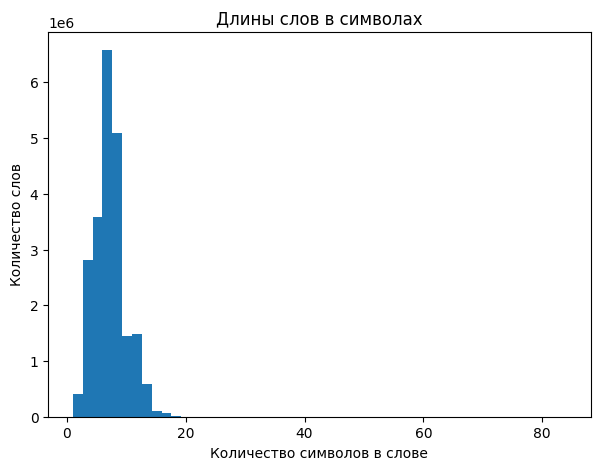

In [ ]:
# Гистограмма длин слов в символах
plt.figure(figsize=(7, 5))
plt.hist(token_len, bins=50)
plt.title('Длины слов в символах')
plt.xlabel('Количество символов в слове')
plt.ylabel('Количество слов')
plt.show()

В списке присутствуют аномально длинные токены (длиннее самого длинного слова в русском язке (25 букв)).

In [ ]:
# Самый длинный токен в списке:
max(token_len)

84

In [ ]:
# Сформируем из списка tokens_without_sw словарь вида {токен : длина токена"}:
corpus_dict = {}
for el in tqdm(tokens_without_sw):
  corpus_dict[el] = len(el)
len(corpus_dict)

100%|██████████| 22203741/22203741 [00:14<00:00, 1489972.88it/s]


286737

In [ ]:
len(corpus_dict)

286737

In [ ]:
# Взглянем на токены длиннее 25 символов:
long_words = [key for key in corpus_dict if corpus_dict[key] >= 25]

len(long_words), long_words

(447,
 ['просроченныхзадолженностей',
  'непогашеиякредитаособенно',
  'работодателяродственников',
  'неправомочныминарушающими',
  'роспотребнадзорпрокуратуруцб',
  'неклиентоориентированного',
  'хамстванаглостинепрофессионализма',
  'клиентоцентричностьвысочайший',
  'просроченнойзадолженности',
  'друзьямродственникамзнакомым',
  'застройщиковправообладателей',
  'страховательзастрахованный',
  'предоплаченныхвиртуальных',
  'положениямираспоряжениями',
  'клиентоориентированностью',
  'временивозможностиресурсов',
  'идентифицированпожалуйста',
  'списаноначисленозаблокировано',
  'федеральнойантимонопольной',
  'основногопролонгированного',
  'картвкладовкредитовсчетов',
  'предложениямипродвижениями',
  'иннпропискудополнительные',
  'хотятпожалуйстаразберитесь',
  'неклиентоориентированность',
  'договоренностейпрошенийтребований',
  'пятницусубботувоскресение',
  'гражданскогопроцессуального',
  'счетазакрытиепереоформление',
  'распоряжениемсамоуправство',
  'представителейа

In [ ]:
# Количество чрезмерно длинных токенов в %:
len(long_words)*100/len(tokens_without_sw)

0.00201317426644456

Токенов длинее 25 символов 447 штук, в основном они представляют собой несколько слов, написанных без пробелов. Их количество несущественно (0,002%).

Построим гистограмму длин отзывов в символах. Для этого воспользуемся списком text_list, в котором к отзывам применнена функция cleaning, но сохранены стоп-слова.

In [ ]:
resp_len_ch = []
for resp in tqdm(text_list):
  resp_len_ch.append(len(resp))

  resp_len_ch[:3]

100%|██████████| 153379/153379 [00:00<00:00, 1186728.05it/s]


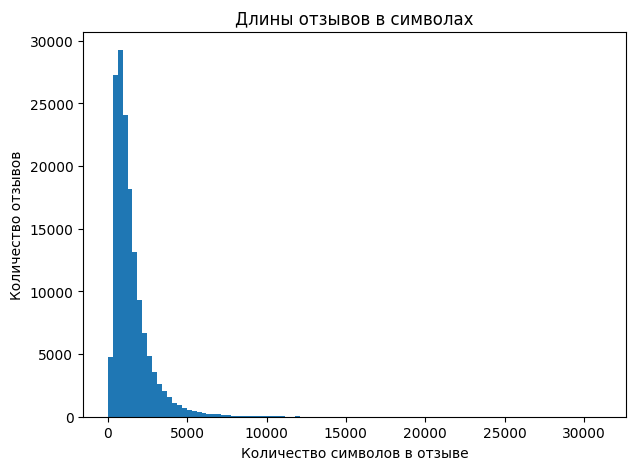

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(resp_len_ch, bins=100)
plt.title('Длины отзывов в символах')
plt.xlabel('Количество символов в отзыве')
plt.ylabel('Количество отзывов')
plt.show()

Построим гистограмму длин отзывов в словах.

In [ ]:
resp_len_w = []
for resp in tqdm(text_list):
  resp_len_w.append(len(resp.split()))

resp_len_w[:3]

100%|██████████| 153379/153379 [00:03<00:00, 40505.60it/s]


[212, 134, 83]

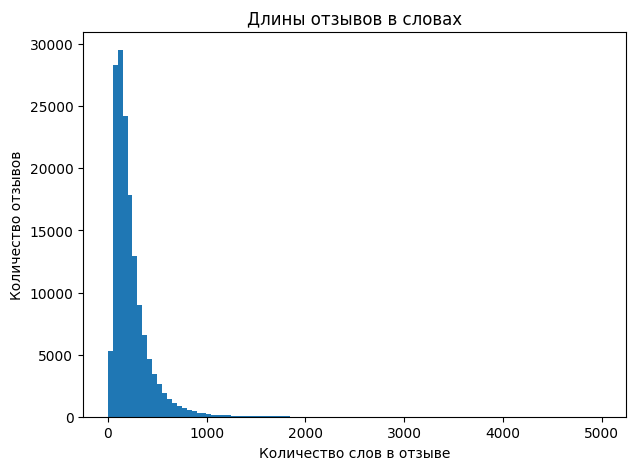

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(resp_len_w, bins=100)
plt.title('Длины отзывов в словах')
plt.xlabel('Количество слов в отзыве')
plt.ylabel('Количество отзывов')
plt.show()

Гистограмы получились одинакового вида, поменялся только масштаб по оси абсцисс (в одном и том же отзыве символов больше, чем слов).

**3. Найдите 10 самых частых:**
  *   **слов**
  *   **слов без стоп-слов**
  *   **лемм**
  *   **существительных**

Данный пункт задания выполним с помощью списка токенов tokens.

In [ ]:
from collections import Counter

In [ ]:
# 10 самых частых слов:

freq_dict = Counter(tokens)
freq_dict.most_common(10)

[('в', 1325207),
 ('и', 1055414),
 ('не', 851617),
 ('на', 707438),
 ('что', 638918),
 ('я', 576611),
 ('с', 457678),
 ('по', 372432),
 ('мне', 320711),
 ('банка', 275353)]

Самые частые слова - это стоп-слова.

In [ ]:
# 10 самых частых слов без стоп-слов:
freq_dict_sw = Counter(tokens_without_sw)
freq_dict_sw.most_common(10)

[('банка', 275353),
 ('банк', 214850),
 ('это', 183207),
 ('деньги', 130766),
 ('карту', 105607),
 ('карты', 101492),
 ('кредит', 80843),
 ('день', 76253),
 ('банке', 71980),
 ('заявление', 70305)]

После удаления стоп-слов самыми частыми токенами стали токены, относящиеся к теме финансов (в т.ч. одни и те же слова ("банк", "карта") в разных формах).

Лемматизацию слов (возьмем их из списка токенов без стоп-слов) выполним с помощью библиотеки pymorphy2 (в ходе экспериментов она показала себя более стабильной по сравнению с pymystem3).

In [ ]:
!pip install pymorphy2

In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [ ]:
lemmas = []

for el in tqdm(tokens_without_sw):
  lemmas.append(pymorphy2_analyzer.parse(el)[0].normal_form)

100%|██████████| 22203741/22203741 [1:15:00<00:00, 4934.10it/s]


In [ ]:
lemmas[:3]

['добрый', 'день', 'являться']

In [ ]:
# 10 самых частых лемм:
freq_dict_lem = Counter(lemmas)
freq_dict_lem.most_common(10)

[('банк', 664949),
 ('карта', 333986),
 ('это', 199883),
 ('деньга', 179207),
 ('день', 173122),
 ('мой', 168845),
 ('кредит', 155620),
 ('который', 148804),
 ('отделение', 143814),
 ('счёт', 141659)]

Из списка лемм без стоп-слов оставим только существительные.

In [ ]:
nouns_list = []
for el in tqdm(lemmas):
  el_temp = pymorphy2_analyzer.parse(el)
  temp = el_temp[0].tag
  if 'NOUN' in temp:
    nouns_list.append(el)

100%|██████████| 22203741/22203741 [1:07:01<00:00, 5521.75it/s]


In [ ]:
nouns_list[:3]

['день', 'клиент', 'банк']

In [ ]:
# 10 самых частых существительных:
freq_dict_lem = Counter(nouns_list)
freq_dict_lem.most_common(10)

[('банк', 664949),
 ('карта', 333986),
 ('деньга', 179207),
 ('день', 173122),
 ('кредит', 155620),
 ('отделение', 143814),
 ('счёт', 141659),
 ('клиент', 136671),
 ('сотрудник', 133944),
 ('сумма', 111074)]

**4. Постройте кривые Ципфа и Хипса**

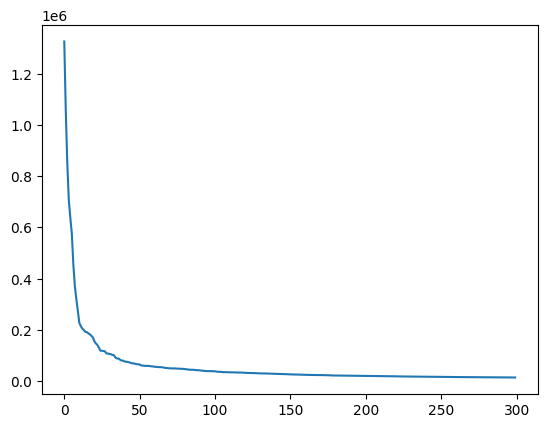

In [ ]:
# Кривая Ципфа

import matplotlib.pyplot as plt
%matplotlib inline

freqs = list(freq_dict.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(range(300), freqs[:300])
plt.show()

In [ ]:
# Кривая Хипса

cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for resp in tqdm(text_list):
    tokens = word_tokenize(resp)
    cnt.update([token for token in tokens])
    n_words.append(len(cnt))
    n_tokens.append(sum(cnt.total()))

100%|██████████| 153379/153379 [08:49<00:00, 289.73it/s]


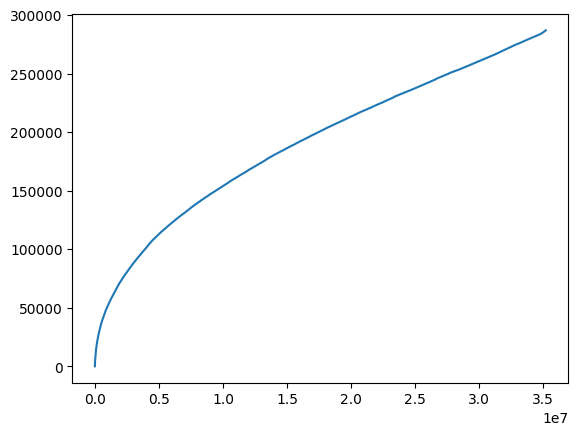

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(n_tokens), list(n_words))
plt.show()

**5. Ответьте на следующие вопросы:**

  *   **какое слово встречается чаще, "сотрудник" или "клиент"?**
  *   **сколько раз встречается слова "мошенничество" и "доверие"?**

In [ ]:
# Количество упоминаний слов "сотрудник" и "клиент":
cnt['сотрудник'], cnt['клиент']

(31153, 20111)

Слово "сотрудник" встречается чаще, чем слово "клиент".

In [ ]:
# Количество упоминаний слов "мошенничество" и "доверие":
cnt['мошенничество'], cnt['доверие']

(1103, 1152)

**6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру tf-idf для того, чтобы найти ключевые слова и биграммы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1).**

In [ ]:
# Импорт инструмента:
from sklearn.feature_extraction.text import TfidfVectorizer

Поиск биграмм.

In [ ]:
# Задание параметров векторизатора (размер словосочетаний - только биграммы, токенизация и исключение стоп-слов):
vect = TfidfVectorizer(ngram_range=(2, 2), analyzer='word', tokenizer=word_tokenize, stop_words=stop_words)

Исходный массив с отзывами - словарь clean_responses.

In [ ]:
# Отзывы с оценками "5" соберем в список rating_5, с оценками "1" - в rating_1:
rating_5 = []
rating_1 = []
for k, v in clean_responses.items():
  if v == 5:
    rating_5.append(k)
  elif v == 1:
    rating_1.append(k)

In [ ]:
len(clean_responses), len(rating_5), len(rating_1)

(153379, 14712, 47383)

Негативных отзывов в несколько раз больше, чем положительных. В сумме их меньше, чем отзывов в исходном массиве, т.к. часть отзывов имеют оценки, отличные от "5" и "1".

In [ ]:
# Биграммы для отзывов с оценкой "5":
bi_5 = vect.fit_transform(rating_5)
bigrams_5 = vect.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
bigrams_5[:10], bigrams_5[10000:10010]

(array(['аа абсолютно', 'аа администратора', 'аа ал', 'аа бесплатным',
        'аа вопрос', 'аа всерьез', 'аа вштырило', 'аа вызвал',
        'аа выпустили', 'аа г'], dtype=object),
 array(['аккуратно вовремя', 'аккуратно возникало', 'аккуратно впечатано',
        'аккуратно вписав', 'аккуратно вставил', 'аккуратно всё',
        'аккуратно выездом', 'аккуратно выполняю', 'аккуратно давая',
        'аккуратно делал'], dtype=object))

In [ ]:
# Биграммы для отзывов с оценкой "1":
bi_1 = vect.fit_transform(rating_1)
bigrams_1 = vect.get_feature_names_out()

In [ ]:
bigrams_1[:10], bigrams_1[10000:10010]

(array(['аа ааа', 'аа администратор', 'аа балета', 'аа бесплатным',
        'аа борис', 'аа вв', 'аа ведущим', 'аа верно', 'аа вернулся',
        'аа взяла'], dtype=object),
 array(['автоматически трех', 'автоматически трогать', 'автоматически ту',
        'автоматически уберут', 'автоматически уведомления',
        'автоматически увеличен', 'автоматически увеличивает',
        'автоматически увеличиваются', 'автоматически увеличил',
        'автоматически увеличили'], dtype=object))

Некоторое количество "мусорных" токенов осталось.

Поиск ключевых слов.

In [ ]:
vect_key_words = TfidfVectorizer()

In [ ]:
# Ключевые слова для отзывов с оценкой "5":
kw_5 = vect_key_words.fit_transform(rating_5)
key_words_5 = vect_key_words.get_feature_names_out()
scores_5 = kw_5.toarray()[0]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
sorted_keywords_5 = [kw for scores_5, kw in sorted(zip(scores_5, key_words_5), reverse=True)]

In [ ]:
# Топ-10 ключевых слов для отзывов с оценкой "5" (с высокими значениями tf-idf):
sorted_keywords_5[:10]

['ленсовета',
 'прикрыли',
 'озерки',
 'несут',
 'вклады',
 'отказала',
 'значительная',
 'заказывала',
 'отпуском',
 'закрывали']

In [ ]:
# Ключевые слова для отзывов с оценкой "1":
kw_1 = vect_key_words.fit_transform(rating_1)
key_words_1 = vect_key_words.get_feature_names_out()
scores_1 = kw_1.toarray()[0]

In [ ]:
sorted_keywords_1 = [kw for scores_1, kw in sorted(zip(scores_1, key_words_1), reverse=True)]

In [ ]:
# Топ-10 ключевых слов для отзывов с оценкой "1" (с высокими значениями tf-idf):
sorted_keywords_1[:10]